### Short introduction to Gradient descent.

<br />
In this coding example we explain how gradient descent would work for a single layer preceptron with linear output.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math

In [2]:
import tensorflow.keras as keras
import tensorflow.compat.v1 as tf1

### Video Links
<br />
https://www.youtube.com/watch?v=sDv4f4s2SB8
<br />
https://www.youtube.com/watch?v=DjF3GiCazwc&list=LLkGG_GT2lhbfvl5e9bZpJ8g&index=2&t=0s

### Case 1, Using the aglortihm to solve for a single parameter.
<br />
For a line fitting task, we are provided with one of the parameters "m" which is used scale the line being fit. Using the optimization technique of gradient descent we will find the bias term needed to fit the curve.

### Given the data, X & Y

In [3]:
X = np.array([0.5,2.3,2.9])
Y = np.array([1.4,1.9,3.2])

### Using pre-calculated slope m = 0.64

The fit line with bias term set at 0, results in model with high Sum of squared error.
<br/>
$$Y = mx + b$$
<br/>
$$SSE = \sum(Y - \hat{Y})^2 = \sum(Y - mx) \ \ \text{Given b = 0}$$
<br/>
$$SSE = 3.15$$

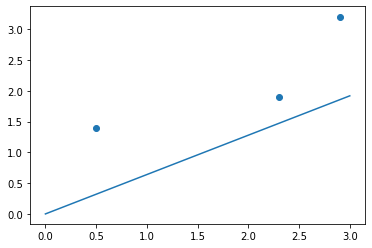

In [4]:
plt.scatter(X,Y)
W = 0.64
plt.plot(range(math.ceil(np.max(X))+1),[W*i for i in range(math.ceil(np.max(X))+1)])
plt.show()

We will use gradient descent to find the parameter 'm' for the optimum value that minimizes SSE our cost function.

(-1, 10)

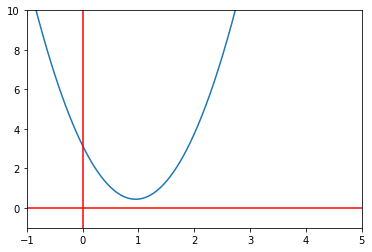

In [5]:
def ss_loss_1(B):
    #Using the X&Y decalred at the top
    return np.sum(((Y - (W*X + B)))**2)

plt.plot([p/1000 for p in range(-10000,10000)],[ss_loss_1(i) for i in [p/1000 for p in range(-10000,10000)]])
plt.axvline(x = 0, c = 'r')
plt.axhline(y = 0, c = 'r')
plt.xlim([-1,5])
plt.ylim([-1,10])

Looking at the curve for SSE vs different alphas, it can be seen that the optimum value of $\alpha$ should be around 1, which minimizes SSE.

$$ loss = \sum(Y - \hat{Y})^ 2 $$
<br />
$$m = 0.64$$
<br />
$$\hat{y} = b + mx$$
<br />
$$SSE = \sum (y_i - (b + mx_i))^2$$
<br />
$$ SSE = (1.4 - (b + 0.32))^2 + (1.9 - (b + 1.4))^2 + (3.2 - (b + 1.8))^2 $$
<br />
$$SSE = f(x_1) + f(x_2) + f(x_3) $$
<br />
<br />
The derivative of SSE will give us an indicator of minimum, as when d/db SSE =0; we will get optimum alpha value
<br />
<br />
$$ \frac{d}{db} \ SSE = f'(x_1) + f'(x_2) + f'(x_3) $$
<br />
$$-2(-b + 1.08) - 2(-b + 0.42) - 2(-b  + 1.3)$$
<br />
$$\frac{d}{db} \ SSE = 6b - 5.7$$
<br />
$$slope(b) = \frac{d}{db} \ SSE = 6b - 5.7$$

### High level overview of gradient descent.
<br />
Given a random starting point in our cost curve (SEE), we use the derivative along with a learning rate C to understand which direction to move. An example is shown below.

### Lets initialize gradient descent at  $b  = 0$
<br />
$$Slope(0) = -5.7$$
<br />
$$Step \ Size(b) = Slope(b) \times C$$
<br />
$$Let \ C = 0.1$$
<br />
$$Step \ Size(Slope(0)) = -5.7 \times 0.1 = -0.57$$
<br />
$$b_{new} = 0 - Step \ Size(Slope(0)) $$
<br />
$$ b_{new} = 0 + 0.57 = 0.57$$
<br />
$$slope(0.57) = -2.3$$
<br />
$$\text{We move closer to 0}$$
<br />
$$sse(0.57) = 1$$
<br />

### From the previous iteration  $b  = 0.57$
<br />
$$Slope(0.57) = -2.3$$
<br />
$$Step Size(Slope(0)) = -2.3 \times 0.1 = -0.23$$
<br />
$$b_{new} = 0.57 - Step Size(Slope(0.57)) = 0 + 0.23 = 0.8, slope(0.8) = -0.9$$
<br />
$$sse(0.8) = 0.5$$

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1,input_dim = 1, activation = 'linear'))

In [7]:
model.layers[0].get_weights()

[array([[-0.27187133]], dtype=float32), array([0.], dtype=float32)]

In [8]:
W=[]
m=np.array([[tf1.constant(0.64)]]) #weights
b=np.array([tf1.Variable(0.)]) #array of biases
W.append(m)
W.append(x)

NameError: name 'x' is not defined

In [ ]:
model.layers[0].set_weights(W)

In [9]:
model.layers[0].get_weights()

[array([[-0.27187133]], dtype=float32), array([0.], dtype=float32)]

In [135]:
model.layers[0].weights[1] = 0

In [95]:
model.compile(loss = 'mse', optimizer = 'SGD')

In [96]:
model.fit(X,Y, epochs = 1)

Train on 3 samples
3/3 [==============================] - 0s 105ms/sample - loss: 0.1506


In [97]:
model.layers[0].get_weights()

[array([[0.63814664]], dtype=float32), array([0.99901336], dtype=float32)]

In [7]:
# We used a fixed value for m
m = tf1.constant(0.64)
#We initialize b at 0
b = tf1.Variable(0.0)

In [8]:
error = 0
for x,y in zip(X,Y):
    y_hat = m*x+b
    error += (y - y_hat)**2

In [9]:
optimizer = tf1.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(error)
init = tf1.global_variables_initializer()

In [10]:
with tf1.Session() as sess:
    sess.run(init)
    training_steps = 1
    for i in range(training_steps):
        sess.run(train)
    slope,intercept = sess.run([m,b])

### The values of m,c after a single iteration of gradient descent.

In [11]:
print (" Slope = ",slope," Intercept = ",intercept)

 Slope =  0.64  Intercept =  0.5704


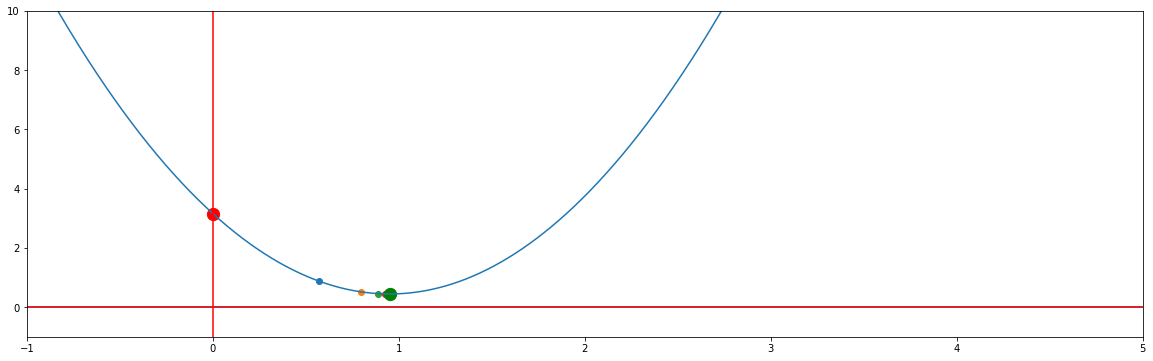

Converged Value  0.95056707


In [12]:
f,ax = plt.subplots(figsize = (20,6))
plt.plot([p/1000 for p in range(-10000,10000)],[ss_loss_1(i) for i in [p/1000 for p in range(-10000,10000)]])



plt.axhline(y=0)

with tf1.Session() as sess:
    sess.run(init)
    training_steps = 10
    
    err = sess.run(error)
    slope,intercept = sess.run([m,b])
    plt.scatter(intercept, err, c = 'r', s = 150)
    
    for i in range(training_steps):
        sess.run(train)
        err = sess.run(error)
        slope,intercept = sess.run([m,b])
        plt.scatter(intercept, err)


plt.scatter(intercept, err,c = 'g', s = 150)    
plt.axvline(x = 0, c = 'r')
plt.axhline(y = 0, c = 'r')
plt.xlim([-1,5])
plt.ylim([-1,10])
plt.show()
print ("Converged Value ",intercept)

After initializing at m = 0, new alphas move closer and closer to the optimum.

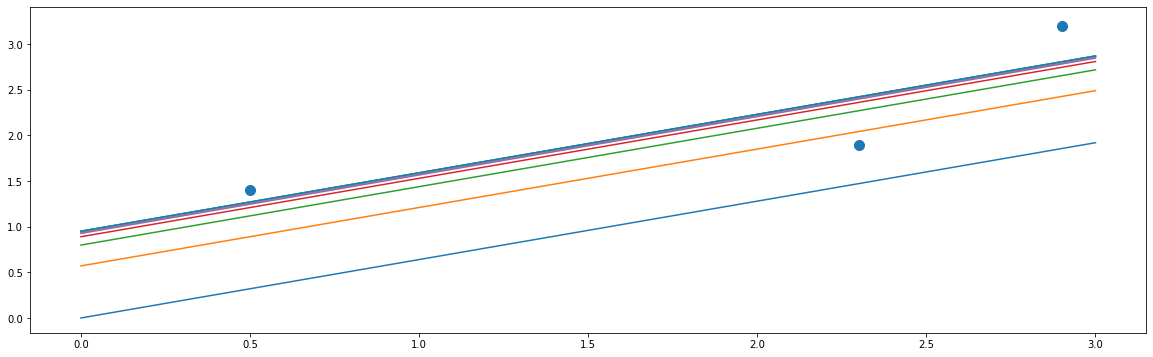

In [13]:
f,ax = plt.subplots(figsize = (20,6))

with tf1.Session() as sess:
    sess.run(init)
    training_steps = 10
    
    err = sess.run(error)
    slope,intercept = sess.run([m,b])
    plt.plot(range(4),[slope*i + intercept for i in range(4)])
    
    for i in range(training_steps):
        sess.run(train)
        err = sess.run(error)
        slope,intercept = sess.run([m,b])
        plt.plot(range(4),[slope*i + intercept for i in range(4)])

plt.scatter(X,Y,s = 100)
plt.show()

### Case 2, Gradient Descent to find both parameters
<br />
Lets use gradient descent to find both parameters alpha and w. Refer to the video links above to understand the calculations behind the equation.

In [191]:
# This time we randomize both variables needed, also we enclose them inside an array
params = tf1.Variable([[8.0,8.]],dtype=tf1.float32)

In [192]:
Xmat = np.vstack([X,np.ones(len(X))])
Xmat = Xmat.astype(np.float32)
y_hat = tf1.matmul(params,Xmat)
error = tf1.reduce_sum((Y - y_hat)**2)

In [193]:
optimizer = tf1.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(error)
init = tf1.global_variables_initializer()

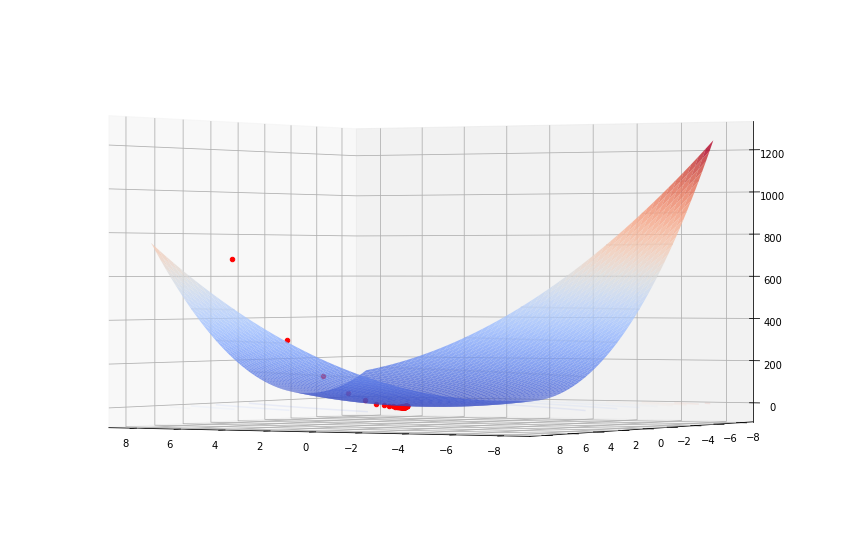

In [194]:
from mpl_toolkits.mplot3d import axes3d

def viz_loss(x1,x2):
    return (1.4 - (x1  + x2*0.32))**2 + (1.9 - (x1  + x2*1.4))**2 + (3.2 - (x1  + x2*1.8))**2 

a1 = np.linspace(-8, 8)
a2 = np.linspace(-8, 8)
A1, A2 = np.meshgrid(a1, a2)
Z = viz_loss(A1, A2)

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection="3d")


with tf1.Session() as sess:
    sess.run(init)
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
        slope,intercept =  sess.run(params)[0]
        SumSq = sess.run(error)
        ax.scatter(slope,intercept,SumSq, c = 'red')


ax.plot_surface(A1, A2, Z, lw=10,cmap="coolwarm", rstride=1, cstride=1, alpha = 0.8)
ax.contour(A1, A2, Z, 10, cmap="coolwarm",linestyles="solid", offset=-1, alpha = 0.1)
ax.contour(A1, A2, Z, 10, colors="k", linestyles="solid", alpha = 0.1)
 
    
ax.view_init(0, 120)    
plt.show()

Above we see that when looking at more than a single factor, the SSE curve we are working with changes into a countour, or surface, similar to a mountaneous terrain. Gradient descent is able to find the minimum of this terratin while using more multiple variables.